In [ ]:
# To upload our datasets from our working directory we need to mount our drive contents to the colab environment.
# For the code to do so you can search “mount” in code snippets or use the code given below.
# Our entire drive contents are now mounted on colab at the location “/gdrive”.
from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
!pip install vecstack

In [ ]:
from vecstack import stacking
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score #works
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
#from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from collections import Counter #for Smote

import warnings
warnings.filterwarnings("ignore")


In [ ]:
trainfile = r'/gdrive/My Drive/Colab Notebooks/RevisedHomesiteTrain1.csv'
train_data = pd.read_csv(trainfile)

#train_data = pd.read_csv("C:/Users/admin/Downloads/Insurance Fraud - TRAIN-3000(1).csv")


testfile = r'/gdrive/My Drive/Colab Notebooks/RevisedHomesiteTest1.csv'
test_data = pd.read_csv(testfile)

#test_data = pd.read_csv("C:/Users/admin/Downloads/Insurance Fraud -TEST-12900(1).csv")


print(train_data.shape)
print(test_data.shape)
#print(train_data.head())

(65000, 596)
(173836, 596)


In [ ]:
#Defining trainData and testData for the first version of our model building:

trainData1 = train_data
testData1 = test_data

In [ ]:
print(trainData1.shape)      # To get (Number of Rows, Number of Columns) of a data frame we use DataFrame.shape
print(testData1.shape)

(65000, 596)
(173836, 596)


In [ ]:
#Understanding the Columns
trainData1.info()
print()
testData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Columns: 596 entries, CoverageField11A to QuoteConversion_Flag
dtypes: float64(5), int64(591)
memory usage: 295.6 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173836 entries, 0 to 173835
Columns: 596 entries, CoverageField11A to GeographicField64
dtypes: float64(5), int64(590), object(1)
memory usage: 790.5+ MB


In [ ]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)
trainData1.head()

,CoverageField11A,CoverageField11B,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,Field10,Field11,Field7,Field8,Field9,GeographicField10A,GeographicField10B,GeographicField11A,GeographicField11B,GeographicField12A,GeographicField12B,GeographicField13A,GeographicField13B,GeographicField14A,GeographicField14B,GeographicField15A,GeographicField15B,GeographicField16A,GeographicField16B,GeographicField17A,GeographicField17B,GeographicField18A,GeographicField18B,GeographicField19A,GeographicField19B,GeographicField1A,GeographicField1B,GeographicField20A,GeographicField20B,GeographicField21A,GeographicField21B,GeographicField22A,GeographicField22B,GeographicField23A,GeographicField23B,GeographicField24A,GeographicField24B,GeographicField25A,GeographicField25B,GeographicField26A,GeographicField26B,GeographicField27A,GeographicField27B,GeographicField28A,GeographicField28B,GeographicField29A,GeographicField29B,GeographicField2A,GeographicField2B,GeographicField30A,GeographicField30B,GeographicField31A,GeographicField31B,GeographicField32A,GeographicField32B,GeographicField33A,GeographicField33B,GeographicField34A,GeographicField34B,GeographicField35A,GeographicField35B,GeographicField36A,GeographicField36B,GeographicField37A,GeographicField37B,GeographicField38A,GeographicField38B,GeographicField39A,GeographicField39B,GeographicField3A,GeographicField3B,GeographicField40A,GeographicField40B,GeographicField41A,GeographicField41B,GeographicField42A,GeographicField42B,GeographicField43A,GeographicField43B,GeographicField44A,GeographicField44B,GeographicField45A,GeographicField45B,GeographicField46A,GeographicField46B,GeographicField47A,GeographicField47B,GeographicField48A,GeographicField48B,GeographicField49A,GeographicField49B,GeographicField4A,GeographicField4B,GeographicField50A,GeographicField50B,GeographicField51A,GeographicField51B,GeographicField52A,GeographicField52B,GeographicField53A,GeographicField53B,GeographicField54A,GeographicField54B,GeographicField55A,GeographicField55B,GeographicField56A,GeographicField56B,GeographicField57A,GeographicField57B,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField5A,GeographicField5B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField6A,GeographicField6B,GeographicField7A,GeographicField7B,GeographicField8A,GeographicField8B,GeographicField9A,GeographicField9B,PersonalField1,PersonalField10A,PersonalField10B,PersonalField11,PersonalField12,PersonalField13,PersonalField14,PersonalField15,PersonalField2,PersonalField22,PersonalField23,PersonalField24,PersonalField25,PersonalField26,PersonalField27,PersonalField28,PersonalField29,PersonalField30,PersonalField31,PersonalField32,PersonalField33,PersonalField34,PersonalField35,PersonalField36,PersonalField37,PersonalField38,PersonalField39,PersonalField40,PersonalField41,PersonalField42,PersonalField43,PersonalField44,PersonalField45,PersonalField46,PersonalField47,PersonalField48,PersonalField49,PersonalField4A,PersonalField4B,PersonalField5,PersonalField50,PersonalField51,PersonalField52,PersonalField53,PersonalField54,PersonalField55,PersonalField56,PersonalField57,PersonalField58,PersonalField59,PersonalField6,PersonalField60,PersonalField61,PersonalField62,PersonalField63,PersonalField64,PersonalField65,PersonalField66,PersonalField67,PersonalField68,PersonalField69,PersonalField70,PersonalField71,PersonalField72,PersonalField73,PersonalField74,PersonalField75,PersonalField76,PersonalField77,PersonalField78,PersonalField79,PersonalField8,PersonalField80,PersonalField81,PersonalField82,PersonalField83,PersonalField9,PropertyField10,PropertyField11A,PropertyField11B,PropertyField12,PropertyField13,PropertyField15,PropertyField16A,PropertyField16B,PropertyField17,PropertyField18,Proper

In [ ]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)
testData1.head()

,CoverageField11A,CoverageField11B,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,Field10,Field11,Field7,Field8,Field9,GeographicField10A,GeographicField10B,GeographicField11A,GeographicField11B,GeographicField12A,GeographicField12B,GeographicField13A,GeographicField13B,GeographicField14A,GeographicField14B,GeographicField15A,GeographicField15B,GeographicField16A,GeographicField16B,GeographicField17A,GeographicField17B,GeographicField18A,GeographicField18B,GeographicField19A,GeographicField19B,GeographicField1A,GeographicField1B,GeographicField20A,GeographicField20B,GeographicField21A,GeographicField21B,GeographicField22A,GeographicField22B,GeographicField23A,GeographicField23B,GeographicField24A,GeographicField24B,GeographicField25A,GeographicField25B,GeographicField26A,GeographicField26B,GeographicField27A,GeographicField27B,GeographicField28A,GeographicField28B,GeographicField29A,GeographicField29B,GeographicField2A,GeographicField2B,GeographicField30A,GeographicField30B,GeographicField31A,GeographicField31B,GeographicField32A,GeographicField32B,GeographicField33A,GeographicField33B,GeographicField34A,GeographicField34B,GeographicField35A,GeographicField35B,GeographicField36A,GeographicField36B,GeographicField37A,GeographicField37B,GeographicField38A,GeographicField38B,GeographicField39A,GeographicField39B,GeographicField3A,GeographicField3B,GeographicField40A,GeographicField40B,GeographicField41A,GeographicField41B,GeographicField42A,GeographicField42B,GeographicField43A,GeographicField43B,GeographicField44A,GeographicField44B,GeographicField45A,GeographicField45B,GeographicField46A,GeographicField46B,GeographicField47A,GeographicField47B,GeographicField48A,GeographicField48B,GeographicField49A,GeographicField49B,GeographicField4A,GeographicField4B,GeographicField50A,GeographicField50B,GeographicField51A,GeographicField51B,GeographicField52A,GeographicField52B,GeographicField53A,GeographicField53B,GeographicField54A,GeographicField54B,GeographicField55A,GeographicField55B,GeographicField56A,GeographicField56B,GeographicField57A,GeographicField57B,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField5A,GeographicField5B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField6A,GeographicField6B,GeographicField7A,GeographicField7B,GeographicField8A,GeographicField8B,GeographicField9A,GeographicField9B,PersonalField1,PersonalField10A,PersonalField10B,PersonalField11,PersonalField12,PersonalField13,PersonalField14,PersonalField15,PersonalField2,PersonalField22,PersonalField23,PersonalField24,PersonalField25,PersonalField26,PersonalField27,PersonalField28,PersonalField29,PersonalField30,PersonalField31,PersonalField32,PersonalField33,PersonalField34,PersonalField35,PersonalField36,PersonalField37,PersonalField38,PersonalField39,PersonalField40,PersonalField41,PersonalField42,PersonalField43,PersonalField44,PersonalField45,PersonalField46,PersonalField47,PersonalField48,PersonalField49,PersonalField4A,PersonalField4B,PersonalField5,PersonalField50,PersonalField51,PersonalField52,PersonalField53,PersonalField54,PersonalField55,PersonalField56,PersonalField57,PersonalField58,PersonalField59,PersonalField6,PersonalField60,PersonalField61,PersonalField62,PersonalField63,PersonalField64,PersonalField65,PersonalField66,PersonalField67,PersonalField68,PersonalField69,PersonalField70,PersonalField71,PersonalField72,PersonalField73,PersonalField74,PersonalField75,PersonalField76,PersonalField77,PersonalField78,PersonalField79,PersonalField8,PersonalField80,PersonalField81,PersonalField82,PersonalField83,PersonalField9,PropertyField10,PropertyField11A,PropertyField11B,PropertyField12,PropertyField13,PropertyField15,PropertyField16A,PropertyField16B,PropertyField17,PropertyField18,Proper

In [ ]:
testData1.drop('GeographicField64', axis = 1, inplace = True)

In [ ]:
#Understanding the Columns
trainData1.info()
print()
testData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Columns: 596 entries, CoverageField11A to QuoteConversion_Flag
dtypes: float64(5), int64(591)
memory usage: 295.6 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173836 entries, 0 to 173835
Columns: 595 entries, CoverageField11A to GeographicField64_TX
dtypes: float64(5), int64(590)
memory usage: 789.1 MB


In [ ]:
# Set the display option to show all columns
#pd.set_option('display.max_rows', None)
# To check number of null values
#trainData1.isna().sum()
#We DON'T have any NULL values in the dataset(Truncating output display)

In [ ]:
# To check basic statistics of a data set, column wise
trainData1.describe()

,CoverageField11A,CoverageField11B,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,Field10,Field11,Field7,Field8,Field9,GeographicField10A,GeographicField10B,GeographicField11A,GeographicField11B,GeographicField12A,GeographicField12B,GeographicField13A,GeographicField13B,GeographicField14A,GeographicField14B,GeographicField15A,GeographicField15B,GeographicField16A,GeographicField16B,GeographicField17A,GeographicField17B,GeographicField18A,GeographicField18B,GeographicField19A,GeographicField19B,GeographicField1A,GeographicField1B,GeographicField20A,GeographicField20B,GeographicField21A,GeographicField21B,GeographicField22A,GeographicField22B,GeographicField23A,GeographicField23B,GeographicField24A,GeographicField24B,GeographicField25A,GeographicField25B,GeographicField26A,GeographicField26B,GeographicField27A,GeographicField27B,GeographicField28A,GeographicField28B,GeographicField29A,GeographicField29B,GeographicField2A,GeographicField2B,GeographicField30A,GeographicField30B,GeographicField31A,GeographicField31B,GeographicField32A,GeographicField32B,GeographicField33A,GeographicField33B,GeographicField34A,GeographicField34B,GeographicField35A,GeographicField35B,GeographicField36A,GeographicField36B,GeographicField37A,GeographicField37B,GeographicField38A,GeographicField38B,GeographicField39A,GeographicField39B,GeographicField3A,GeographicField3B,GeographicField40A,GeographicField40B,GeographicField41A,GeographicField41B,GeographicField42A,GeographicField42B,GeographicField43A,GeographicField43B,GeographicField44A,GeographicField44B,GeographicField45A,GeographicField45B,GeographicField46A,GeographicField46B,GeographicField47A,GeographicField47B,GeographicField48A,GeographicField48B,GeographicField49A,GeographicField49B,GeographicField4A,GeographicField4B,GeographicField50A,GeographicField50B,GeographicField51A,GeographicField51B,GeographicField52A,GeographicField52B,GeographicField53A,GeographicField53B,GeographicField54A,GeographicField54B,GeographicField55A,GeographicField55B,GeographicField56A,GeographicField56B,GeographicField57A,GeographicField57B,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField5A,GeographicField5B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField6A,GeographicField6B,GeographicField7A,GeographicField7B,GeographicField8A,GeographicField8B,GeographicField9A,GeographicField9B,PersonalField1,PersonalField10A,PersonalField10B,PersonalField11,PersonalField12,PersonalField13,PersonalField14,PersonalField15,PersonalField2,PersonalField22,PersonalField23,PersonalField24,PersonalField25,PersonalField26,PersonalField27,PersonalField28,PersonalField29,PersonalField30,PersonalField31,PersonalField32,PersonalField33,PersonalField34,PersonalField35,PersonalField36,PersonalField37,PersonalField38,PersonalField39,PersonalField40,PersonalField41,PersonalField42,PersonalField43,PersonalField44,PersonalField45,PersonalField46,PersonalField47,PersonalField48,PersonalField49,PersonalField4A,PersonalField4B,PersonalField5,PersonalField50,PersonalField51,PersonalField52,PersonalField53,PersonalField54,PersonalField55,PersonalField56,PersonalField57,PersonalField58,PersonalField59,PersonalField6,PersonalField60,PersonalField61,PersonalField62,PersonalField63,PersonalField64,PersonalField65,PersonalField66,PersonalField67,PersonalField68,PersonalField69,PersonalField70,PersonalField71,PersonalField72,PersonalField73,PersonalField74,PersonalField75,PersonalField76,PersonalField77,PersonalField78,PersonalField79,PersonalField8,PersonalField80,PersonalField81,PersonalField82,PersonalField83,PersonalField9,PropertyField10,PropertyField11A,PropertyField11B,PropertyField12,PropertyField13,PropertyField15,PropertyField16A,PropertyField16B,PropertyField17,PropertyField18,Proper

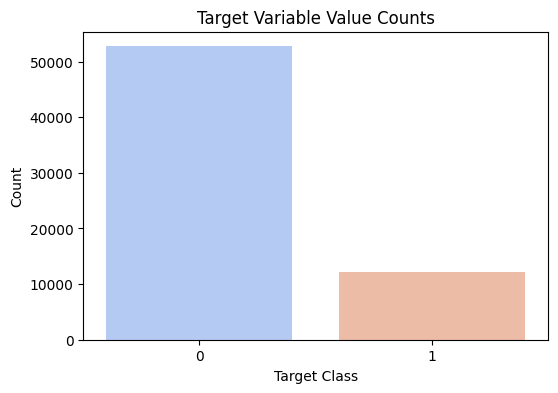

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

value_counts = trainData1['QuoteConversion_Flag'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.barplot(x=value_counts.index, y=value_counts, palette='coolwarm')
plt.title('Target Variable Value Counts')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData1.columns.values)
TestCols = list(testData1.columns.values)
print(TrainCols)
print(TestCols)

['CoverageField11A', 'CoverageField11B', 'CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'Field10', 'Field11', 'Field7', 'Field8', 'Field9', 'GeographicField10A', 'GeographicField10B', 'GeographicField11A', 'GeographicField11B', 'GeographicField12A', 'GeographicField12B', 'GeographicField13A', 'GeographicField13B', 'GeographicField14A', 'GeographicField14B', 'GeographicField15A', 'GeographicField15B', 'GeographicField16A', 'GeographicField16B', 'GeographicField17A', 'GeographicField17B', 'GeographicField18A', 'GeographicField18B', 'GeographicField19A', 'GeographicField19B', 'GeographicField1A', 'GeographicField1B', 'GeographicField20A', 'GeographicField20B', 'GeographicField21A', 'GeographicField21B', 'GeographicField22A', 'GeographicField22B', 'GeographicField23A', 'GeographicField23B', 'GeographicField24A',

In [ ]:
# Seperate Target column from Train Data
Xtrain = trainData1[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = trainData1[['QuoteConversion_Flag']].copy()
print(Xtrain.shape)
print(Ytrain.shape)
#Xtest = testData.drop(['TARGET'], axis=1)
Xtest = testData1
print(Xtest.shape)

(65000, 595)
(65000, 1)
(173836, 595)


# **Checking the minority prediction with different sampling percentages!**

In [ ]:
from imblearn.over_sampling import SMOTE

# For the features features Xtrain and label Ytrain
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(Xtrain, Ytrain)
print(X_resampled.shape)
print(y_resampled.shape)

(105476, 595)
(105476, 1)


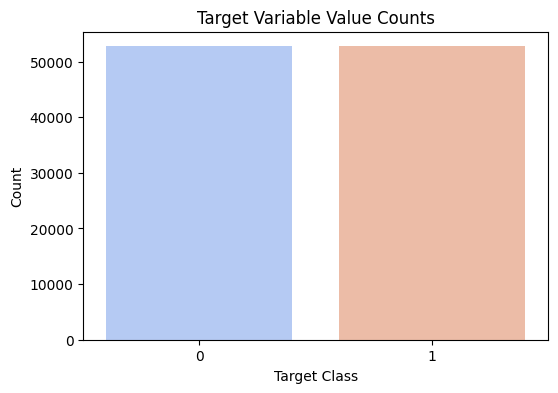

In [ ]:
value_counts = y_resampled['QuoteConversion_Flag'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.barplot(x=value_counts.index, y=value_counts, palette='coolwarm')
plt.title('Target Variable Value Counts')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
# Initialising Decision Tree Algorithm and fitting the model on train set
dt = DecisionTreeClassifier()
#dt = DecisionTreeClassifier(criterion = "entropy")
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 20, splitter="best", min_samples_split=2)
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 15, max_leaf_nodes = 100)
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 30, max_leaf_nodes = 100, max_features = 9)

dt.fit(X_resampled, y_resampled)
Y_Pred = dt.predict(Xtest)
#print (Y_Pred)
Y_Pred = pd.DataFrame(Y_Pred,columns=['QuoteConversion_Flag'])
#print (Y_Pred)
#Y_Pred.to_csv(index=False)
# Use this Y_Pred on Kaggle website to get accuracy result.

In [ ]:
# For us to check accuracy of our algorithm, we need to predict that data set for which we have TARGET available.
# Eg predict for Xtrain and check accuracy with TARGET that we have in order to judge our model.

Train_Pred = dt.predict(X_resampled)
#Model Accuracy
print(" TRAIN Accuracy:", metrics.accuracy_score(y_resampled,Train_Pred))

# This will always result in best score hence we are better off using TrainTestSplit, which can help us take care of

 TRAIN Accuracy: 1.0


In [ ]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = .50, random_state = 1)
# Fit model on new Train Dataset
dt = dt.fit(X_train, Y_train)
#Predict the responce on new Test Dataset
Y_PredNew = dt.predict(X_test)
#Model Accuracy
print("TEST Accuracy:", metrics.accuracy_score(Y_test,Y_PredNew))

TEST Accuracy: 0.8836615384615385


In [ ]:
# Actual VS Predicted Matrix and TP,FP,TN,FN evaluation
print(metrics.confusion_matrix(Y_test, Y_PredNew))
print()
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Y_test, Y_PredNew))

[[24512  1991]
 [ 1790  4207]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     26503
           1       0.68      0.70      0.69      5997

    accuracy                           0.88     32500
   macro avg       0.81      0.81      0.81     32500
weighted avg       0.89      0.88      0.88     32500



**Now, let's do SMOTE with a different sampling strategy value!**

In [ ]:

trainfile = r'/gdrive/My Drive/Colab Notebooks/RevisedHomesiteTrain1.csv'
train_data = pd.read_csv(trainfile)

#train_data = pd.read_csv("C:/Users/admin/Downloads/Insurance Fraud - TRAIN-3000(1).csv")


testfile = r'/gdrive/My Drive/Colab Notebooks/RevisedHomesiteTest1.csv'
test_data = pd.read_csv(testfile)

#test_data = pd.read_csv("C:/Users/admin/Downloads/Insurance Fraud -TEST-12900(1).csv")


print(train_data.shape)
print(test_data.shape)
#print(train_data.head())

(65000, 596)
(173836, 596)


In [ ]:
#Defining trainData and testData for the first version of our model building:

trainData2 = train_data
testData2 = test_data

In [ ]:
testData2.drop('GeographicField64', axis=1, inplace=True)

In [ ]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData2.columns.values)
TestCols = list(testData2.columns.values)
print(TrainCols)
print(TestCols)

['CoverageField11A', 'CoverageField11B', 'CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'Field10', 'Field11', 'Field7', 'Field8', 'Field9', 'GeographicField10A', 'GeographicField10B', 'GeographicField11A', 'GeographicField11B', 'GeographicField12A', 'GeographicField12B', 'GeographicField13A', 'GeographicField13B', 'GeographicField14A', 'GeographicField14B', 'GeographicField15A', 'GeographicField15B', 'GeographicField16A', 'GeographicField16B', 'GeographicField17A', 'GeographicField17B', 'GeographicField18A', 'GeographicField18B', 'GeographicField19A', 'GeographicField19B', 'GeographicField1A', 'GeographicField1B', 'GeographicField20A', 'GeographicField20B', 'GeographicField21A', 'GeographicField21B', 'GeographicField22A', 'GeographicField22B', 'GeographicField23A', 'GeographicField23B', 'GeographicField24A',

In [ ]:
# Seperate Target column from Train Data
Xtrain = trainData2[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = trainData2[['QuoteConversion_Flag']].copy()
print(Xtrain.shape)
print(Ytrain.shape)
#Xtest = testData.drop(['TARGET'], axis=1)
Xtest = testData2
print(Xtest.shape)

(65000, 595)
(65000, 1)
(173836, 595)


In [ ]:
from imblearn.over_sampling import SMOTE

# For the features features Xtrain and label Ytrain
smote = SMOTE(sampling_strategy=0.3)
X_resampled, y_resampled = smote.fit_resample(Xtrain, Ytrain)
print(X_resampled.shape)
print(y_resampled.shape)

(68559, 595)
(68559, 1)


In [ ]:
# Initialising Decision Tree Algorithm and fitting the model on train set
dt = DecisionTreeClassifier()
#dt = DecisionTreeClassifier(criterion = "entropy")
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 20, splitter="best", min_samples_split=2)
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 15, max_leaf_nodes = 100)
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 30, max_leaf_nodes = 100, max_features = 9)

dt.fit(X_resampled, y_resampled)
Y_Pred = dt.predict(Xtest)
#print (Y_Pred)
Y_Pred = pd.DataFrame(Y_Pred,columns=['QuoteConversion_Flag'])
#print (Y_Pred)
#Y_Pred.to_csv(index=False)
# Use this Y_Pred on Kaggle website to get accuracy result.

In [ ]:
# For us to check accuracy of our algorithm, we need to predict that data set for which we have TARGET available.
# Eg predict for Xtrain and check accuracy with TARGET that we have in order to judge our model.

Train_Pred = dt.predict(X_resampled)
#Model Accuracy
print(" TRAIN Accuracy:", metrics.accuracy_score(y_resampled,Train_Pred))

# This will always result in best score hence we are better off using TrainTestSplit, which can help us take care of

 TRAIN Accuracy: 1.0


In [ ]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = .50, random_state = 1)
# Fit model on new Train Dataset
dt = dt.fit(X_train, Y_train)
#Predict the responce on new Test Dataset
Y_PredNew = dt.predict(X_test)
#Model Accuracy
print("TEST Accuracy:", metrics.accuracy_score(Y_test,Y_PredNew))

TEST Accuracy: 0.8833230769230769


In [ ]:
# Actual VS Predicted Matrix and TP,FP,TN,FN evaluation
print(metrics.confusion_matrix(Y_test, Y_PredNew))
print()
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Y_test, Y_PredNew))

[[24523  1980]
 [ 1812  4185]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     26503
           1       0.68      0.70      0.69      5997

    accuracy                           0.88     32500
   macro avg       0.81      0.81      0.81     32500
weighted avg       0.88      0.88      0.88     32500



**The prediction for the minority class is not improving much with changing the sampling strategy values!**

**TRYING DIFFERENT MODELS ON THE DATA:**

In [ ]:
trainfile = r'/gdrive/My Drive/Colab Notebooks/RevisedHomesiteTrain1.csv'
train_data = pd.read_csv(trainfile)

#train_data = pd.read_csv("C:/Users/admin/Downloads/Insurance Fraud - TRAIN-3000(1).csv")


testfile = r'/gdrive/My Drive/Colab Notebooks/RevisedHomesiteTest1.csv'
test_data = pd.read_csv(testfile)

#test_data = pd.read_csv("C:/Users/admin/Downloads/Insurance Fraud -TEST-12900(1).csv")


print(train_data.shape)
print(test_data.shape)
#print(train_data.head())

(65000, 596)
(173836, 596)


In [ ]:
#Defining trainData and testData for the first version of our model building:

trainData2 = train_data
testData2 = test_data

In [ ]:
testData2.drop('GeographicField64', axis=1, inplace=True)

In [ ]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData2.columns.values)
TestCols = list(testData2.columns.values)
print(TrainCols)
print(TestCols)

['CoverageField11A', 'CoverageField11B', 'CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'Field10', 'Field11', 'Field7', 'Field8', 'Field9', 'GeographicField10A', 'GeographicField10B', 'GeographicField11A', 'GeographicField11B', 'GeographicField12A', 'GeographicField12B', 'GeographicField13A', 'GeographicField13B', 'GeographicField14A', 'GeographicField14B', 'GeographicField15A', 'GeographicField15B', 'GeographicField16A', 'GeographicField16B', 'GeographicField17A', 'GeographicField17B', 'GeographicField18A', 'GeographicField18B', 'GeographicField19A', 'GeographicField19B', 'GeographicField1A', 'GeographicField1B', 'GeographicField20A', 'GeographicField20B', 'GeographicField21A', 'GeographicField21B', 'GeographicField22A', 'GeographicField22B', 'GeographicField23A', 'GeographicField23B', 'GeographicField24A',

In [ ]:
# Seperate Target column from Train Data
Xtrain = trainData2[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = trainData2[['QuoteConversion_Flag']].copy()
print(Xtrain.shape)
print(Ytrain.shape)
#Xtest = testData.drop(['TARGET'], axis=1)
Xtest = testData2
print(Xtest.shape)

(65000, 595)
(65000, 1)
(173836, 595)


In [ ]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = .50, random_state = 1)

In [ ]:
from imblearn.over_sampling import SMOTE

# For the features features Xtrain and label Ytrain
smote = SMOTE(sampling_strategy=0.3)
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)
print(X_resampled.shape)
print(y_resampled.shape)

(34105, 595)
(34105, 1)


In [ ]:
#CONSTRUCT DEFAULT DECISION TREE AND OBTAIN RESPECTIVE ACCURACY
clf = DecisionTreeClassifier()
clf.fit(X_resampled,y_resampled)
clf_predict=clf.predict(X_test)
print("accuracy Score (training) for Decision Tree:{0:6f}".format(clf.score(X_test,Y_test)))
print("Confusion Matrix for Decision Tree")
print(confusion_matrix(Y_test,clf_predict))

accuracy Score (training) for Decision Tree:0.881846
Confusion Matrix for Decision Tree
[[24461  2042]
 [ 1798  4199]]


In [ ]:
#Hyperparameter tuning done for decision tree classifier
parameters={'min_samples_split' : range(10,100,10),'max_depth': range(1,20,2)}
clf_random = RandomizedSearchCV(clf,parameters,n_iter=15)
clf_random.fit(X_resampled, y_resampled)
grid_parm=clf_random.best_params_
print(grid_parm)

#Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier
clf = DecisionTreeClassifier(**grid_parm)
clf.fit(X_resampled,y_resampled)
clf_predict = clf.predict(X_test)

#Obtain accuracy ,confusion matrix,classification report and AUC values for the result above.
print("accuracy Score (training) after hypertuning for Decision Tree:{0:6f}".format(clf.score(X_test,Y_test)))
print("Confusion Matrix after hypertuning for Decision Tree")
print(confusion_matrix(Y_test,clf_predict))
print("=== Classification Report ===")
print(classification_report(Y_test,clf_predict))

#get cross-validation report
clf_cv_score = cross_val_score(clf, X_resampled, y_resampled, cv=10, scoring="roc_auc")
print("=== All AUC Scores ===")
print(clf_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Decision Tree: ",clf_cv_score.mean())


{'min_samples_split': 80, 'max_depth': 11}
accuracy Score (training) after hypertuning for Decision Tree:0.912677
Confusion Matrix after hypertuning for Decision Tree
[[25749   754]
 [ 2084  3913]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     26503
           1       0.84      0.65      0.73      5997

    accuracy                           0.91     32500
   macro avg       0.88      0.81      0.84     32500
weighted avg       0.91      0.91      0.91     32500

=== All AUC Scores ===
[0.94245645 0.93972848 0.92953157 0.93913843 0.93871544 0.94038854
 0.94898951 0.94633486 0.98207868 0.98041468]


=== Mean AUC Score ===
Mean AUC Score - Decision Tree:  0.9487776641157166


In [ ]:
#Construct Random Forest Model

rfc = RandomForestClassifier()
rfc.fit(X_resampled, y_resampled)
rfc_predict=rfc.predict(X_test)
print("accuracy Score (training) for RandomForest:{0:6f}".format(rfc.score(X_test,Y_test)))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(Y_test,rfc_predict))

accuracy Score (training) for RandomForest:0.904708
Confusion Matrix for Random Forest:
[[25923   580]
 [ 2517  3480]]


In [ ]:
#Hyperparameter tuning for random forest classifier
rfc_random = RandomizedSearchCV(rfc,parameters,n_iter=15)
rfc_random.fit(X_resampled, y_resampled)
grid_parm_rfc=rfc_random.best_params_
print(grid_parm_rfc)

#Construct Random Forest with best parameters
rfc= RandomForestClassifier(**grid_parm_rfc)
rfc.fit(X_resampled,y_resampled)
rfc_predict = rfc.predict(X_test)
print("accuracy Score (training) after hypertuning for Random Forest:{0:6f}".format(rfc.score(X_test,Y_test)))
print("Confusion Matrix after hypertuning for Random Forest:")
print(confusion_matrix(Y_test,rfc_predict))
print("=== Classification Report ===")
print(classification_report(Y_test,rfc_predict))

#get cross-validation report
rfc_cv_score = cross_val_score(rfc, X_resampled, y_resampled, cv=10, scoring="roc_auc")
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ",rfc_cv_score.mean())


{'min_samples_split': 10, 'max_depth': 19}
accuracy Score (training) after hypertuning for Random Forest:0.906092
Confusion Matrix after hypertuning for Random Forest:
[[25905   598]
 [ 2454  3543]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     26503
           1       0.86      0.59      0.70      5997

    accuracy                           0.91     32500
   macro avg       0.88      0.78      0.82     32500
weighted avg       0.90      0.91      0.90     32500

=== All AUC Scores ===
[0.95054932 0.94246831 0.9364216  0.93504006 0.94157876 0.94027615
 0.95329509 0.95248561 0.9959565  0.99627622]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.954434761806397


In [ ]:
#Construct MultiLayer Perceptron Model
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=100)
mlp.fit(X_resampled, y_resampled)
mlp_predict=mlp.predict(X_test)
print("accuracy Score (training) for MultiLayer Perceptron:{0:6f}".format(mlp.score(X_test,Y_test)))
print("Confusion Matrix for MultiLayer Perceptron:")
print(confusion_matrix(Y_test,mlp_predict))


accuracy Score (training) for MultiLayer Perceptron:0.838800
Confusion Matrix for MultiLayer Perceptron:
[[23623  2880]
 [ 2359  3638]]


In [ ]:
#Hyperparameter tuning done for MultiLayer Perceptron classifier

#parameters = {'hidden_layer_sizes':[(10,), (20,)], 'activation':['tanh', 'relu'], 'solver':['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate':['constant', 'adaptive']}
#parameters = {'hidden_layer_sizes':[(10,5), (20,5)], 'activation':['tanh', 'relu'], 'learning_rate':['constant', 'adaptive']}
parameters = {'hidden_layer_sizes':[(10,5,3), (20,7,3)], 'activation':['tanh', 'relu'], 'learning_rate':['constant', 'adaptive'], 'max_iter' :[100, 150]}
#parameters = {'hidden_layer_sizes':[(10,), (15,), (10,5), (20,7,3)]}

mlp_random = RandomizedSearchCV(mlp,parameters,n_iter=15)
mlp_random.fit(X_resampled, y_resampled)
grid_parm=mlp_random.best_params_
print(grid_parm)

#Using the parameters obtained from HyperParameterTuning in the MLPClassifier
mlp = MLPClassifier(**grid_parm)
mlp.fit(X_resampled,y_resampled)
mlp_predict = mlp.predict(X_test)

#Obtain accuracy ,confusion matrix,classification report and AUC values for the result above.
print("accuracy Score (training) after hypertuning for MultiLayer Perceptron:{0:6f}".format(mlp.score(X_test,Y_test)))
print("Confusion Matrix after hypertuning for MultiLayer Perceptron")
print(confusion_matrix(Y_test,mlp_predict))
print("=== Classification Report ===")
print(classification_report(Y_test,mlp_predict))

#get cross-validation report
mlp_cv_score = cross_val_score(mlp, X_resampled, y_resampled, cv=10, scoring="roc_auc")
print("=== All AUC Scores ===")
print(mlp_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - MultiLayer Perceptron: ",mlp_cv_score.mean())


accuracy Score (training) after hypertuning for MultiLayer Perceptron:0.815477
Confusion Matrix after hypertuning for MultiLayer Perceptron
[[26503     0]
 [ 5997     0]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     26503
           1       0.00      0.00      0.00      5997

    accuracy                           0.82     32500
   macro avg       0.41      0.50      0.45     32500
weighted avg       0.67      0.82      0.73     32500

=== All AUC Scores ===
[0.50164932 0.50883304 0.83163139 0.81980816 0.78500335 0.5
 0.5        0.5        0.5        0.49949305]


=== Mean AUC Score ===
Mean AUC Score - MultiLayer Perceptron:  0.5946418312938411


In [ ]:
#Construct K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_resampled, y_resampled)
neigh_predict=neigh.predict(X_test)
print("accuracy Score (training) for KNeighborsClassifier:{0:6f}".format(neigh.score(X_test,Y_test)))
print("Confusion Matrix for KNeighborsClassifier:")
print(confusion_matrix(Y_test,neigh_predict))


accuracy Score (training) for KNeighborsClassifier:0.730215
Confusion Matrix for KNeighborsClassifier:
[[22760  3743]
 [ 5025   972]]


In [ ]:
#Hyperparameter tuning done for K-Nearest Neighbor classifier

parameters = {'n_neighbors':[3,5,7,9,11], 'weights':['uniform', 'distance'], 'p':[1,2]}


neigh_random = RandomizedSearchCV(neigh,parameters,n_iter=15)
neigh_random.fit(X_resampled, y_resampled)
grid_parm=neigh_random.best_params_
print(grid_parm)

#Using the parameters obtained from HyperParameterTuning in the MLPClassifier
neigh = KNeighborsClassifier(**grid_parm)
neigh.fit(X_resampled,y_resampled)
neigh_predict = neigh.predict(X_test)

#Obtain accuracy ,confusion matrix,classification report and AUC values for the result above.
print("accuracy Score (training) after hypertuning for KNeighborsClassifier:{0:6f}".format(neigh.score(X_test,Y_test)))
print("Confusion Matrix after hypertuning for KNeighborsClassifier")
print(confusion_matrix(Y_test,neigh_predict))
print("=== Classification Report ===")
print(classification_report(Y_test,neigh_predict))

#get cross-validation report
neigh_cv_score = cross_val_score(neigh, X_resampled, y_resampled, cv=10, scoring="roc_auc")
print("=== All AUC Scores ===")
print(neigh_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - KNeighborsClassifier: ",neigh_cv_score.mean())

In [ ]:
#Construct Linear Support Vector Machine Model
from sklearn.svm import LinearSVC
linsvm = LinearSVC(max_iter=300)
linsvm.fit(X_resampled, y_resampled)
linsvm_predict=linsvm.predict(X_test)
print("accuracy Score (training) for Linear SVM Classifier:{0:6f}".format(linsvm.score(X_test,Y_test)))
print("Confusion Matrix for Linear SVM Classifier:")
print(confusion_matrix(Y_test,linsvm_predict))


In [ ]:
#Construct Support Vector Machine Model
from sklearn.svm import SVC
svm = SVC(max_iter=500)
svm.fit(X_resampled, y_resampled)
svm_predict=svm.predict(X_test)
print("accuracy Score (training) for SVM Classifier:{0:6f}".format(svm.score(X_test,Y_test)))
print("Confusion Matrix for SVM Classifier:")
print(confusion_matrix(Y_test,svm_predict))

In [ ]:
#Construct Gradient Boosting model

search_grid={'n_estimators':[5,10,20],'learning_rate':[0.01,.1]}
abc =GradientBoostingClassifier()
abc.fit(X_resampled, y_resampled)
abc_predict=abc.predict(X_test)
print("accuracy Score (training) for Boosting:{0:6f}".format(abc.score(X_test,Y_test)))
print("Confusion Matrix for boosting:")
print(confusion_matrix(Y_test,abc_predict))
abc_random = RandomizedSearchCV(abc,search_grid,n_iter=15)
abc_random.fit(X_resampled, y_resampled)
grid_parm_abc=abc_random.best_params_
print(grid_parm_abc)
abc= GradientBoostingClassifier(**grid_parm_abc)
abc.fit(X_resampled,y_resampled)
abc_predict = abc.predict(X_test)
print("accuracy Score (training) after hypertuning for Boosting:{0:6f}".format(abc.score(X_test,Y_test)))
print("Confusion Matrix after hypertuning for Boosting:")
print(confusion_matrix(Y_test,abc_predict))
print("=== Classification Report ===")
print(classification_report(Y_test,abc_predict))
abc_cv_score = cross_val_score(abc, X_resampled, y_resampled, cv=10, scoring="roc_auc")
print("=== All AUC Scores ===")
print(abc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Boosting: ",abc_cv_score.mean())

# **STACKING:**

In [ ]:
print("___________________________________________________________________________________________\nEnsemble Methods Predictions using GradientBoosting, RandomForest and Decision Tree Classifier\n")

models = [ KNeighborsClassifier(), MLPClassifier(), SVC(), LinearSVC(), RandomForestClassifier(), DecisionTreeClassifier() ]

S_Train, S_Test = stacking(models,
                           X_resampled, y_resampled, X_test,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)
